<a href="https://colab.research.google.com/github/Ashi743/ML-practices/blob/main/imputation_of_titanic_wrt_fx%2C_skew%2C_outlier_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [60]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_gaussian_quantiles
import matplotlib.pyplot as plt

In [61]:
X1, y1 = make_gaussian_quantiles(cov=3.,
                                 n_samples=1000, n_features=2,
                                 n_classes=2, random_state=1)
X1 = pd.DataFrame(X1,columns=['x','y'])
y1 = pd.Series(y1)

# Gaussian 2
X2, y2 = make_gaussian_quantiles(mean=(4, 4), cov=1,
                                 n_samples=500, n_features=2,
                                 n_classes=2, random_state=1)
X2 = pd.DataFrame(X2,columns=['x','y'])
y2 = pd.Series(y2)

df = pd.DataFrame(np.concatenate((X1, X2)))
y = pd.Series(np.concatenate((y1, - y2 + 1)))

x=df.sample(1500)[0:1000]


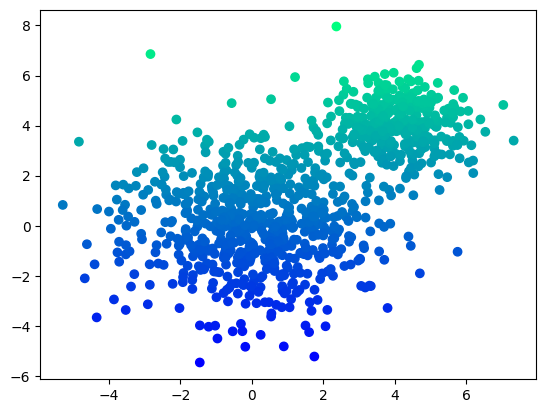

In [62]:
plt.scatter(x.iloc[:,0],x.iloc[:,1] ,c=x.iloc[:,-1],cmap='winter')

In [63]:
df['y'] = y
df['y'].value_counts()

,count
y,
0,750
1,750


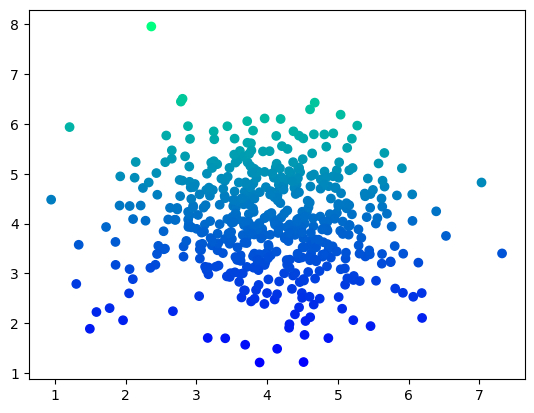

In [64]:
plt.scatter(X2.iloc[:,0],X2.iloc[:,1],c=X2.iloc[:,-1],cmap='winter')

***function transformer***


In [65]:
import pandas as pd
import numpy as np
import scipy.stats as stats

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from datasets

In [66]:
df= pd.read_csv('/content/titanic_train.csv')

In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [68]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [69]:
df['family_size'] = df['SibSp'] + df['Parch']
df.drop(['SibSp','Parch'],axis=1,inplace=True)

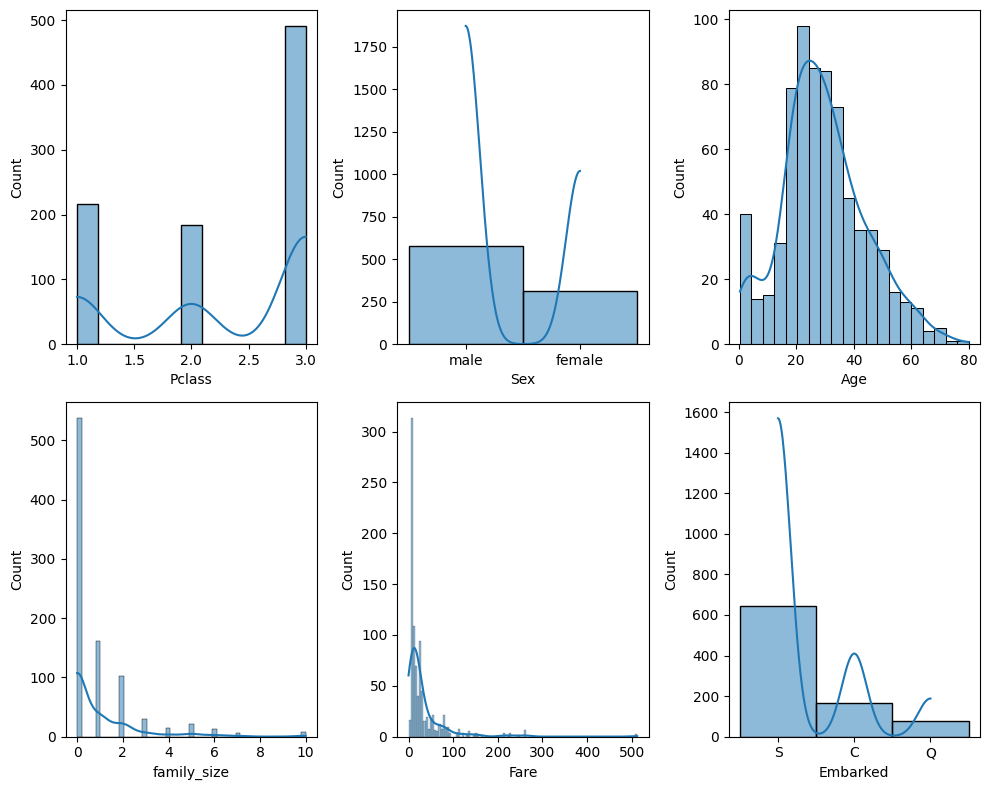

In [70]:
import matplotlib.pyplot as plt
import seaborn as sns

columns = ['Pclass', 'Sex', 'Age', 'family_size', 'Fare', 'Embarked']
fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(10, 8))

# Flatten the 2D array of axes to a 1D array
ax = ax.flatten()

# Loop over the columns and plot the histograms
for i, column in enumerate(columns):
    sns.histplot(df[column], ax=ax[i], kde=True)

# Hide any unused subplots
for j in range(len(columns), len(ax)):
    fig.delaxes(ax[j])

# Adjusting the layout so plots don't overlap
plt.tight_layout()
plt.show()


In [71]:
df1= df[["Age","Fare", "Survived"]]

In [72]:
df1.isnull().sum()

,0
Age,177
Fare,0
Survived,0


In [73]:
df1["Age"].skew()

0.38910778230082704

In [74]:
Q1 = df1["Age"].quantile(0.25)
Q3 = df1["Age"].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
# Correct the condition to identify outliers
value = df1[(df1["Age"] < lower_bound) | (df1["Age"] > upper_bound)]
df1["Age"].min(),df1["Age"].max()

(0.42, 80.0)

In [75]:
import numpy as np

def outlier(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    # Correct the condition to identify outliers
    value = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    # Calculate the percentage of outliers
    perc = len(value) / len(df[col])
    return perc


In [76]:
outlier_percentage = outlier(df, "Age")
print(f"Percentage of outliers in 'Age': {outlier_percentage:.2%}")

outlier_percentage = outlier(df, "Fare")
print(f"Percentage of outliers in 'Fare': {outlier_percentage:.2%}")

Percentage of outliers in 'Age': 1.23%
Percentage of outliers in 'Fare': 13.02%


<Axes: xlabel='Age', ylabel='Count'>

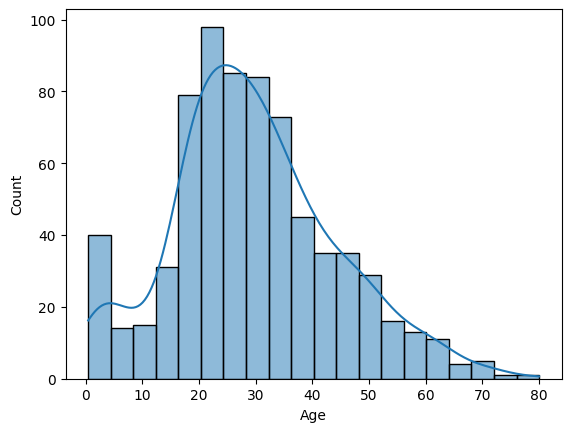

In [77]:
sns.histplot(df1["Age"], kde=True)

KNN imputer or simple imputer for AGE

In [78]:
from sklearn.impute import KNNImputer, SimpleImputer
knn= KNNImputer(n_neighbors= 8)
df1["Age_knn"]=knn.fit_transform(df1[["Age"]])
df1["Age_sii"]= SimpleImputer().fit_transform(df1[["Age"]])

<ipython-input-78-7c2c4f47d7ee>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1["Age_knn"]=knn.fit_transform(df1[["Age"]])
<ipython-input-78-7c2c4f47d7ee>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1["Age_sii"]= SimpleImputer().fit_transform(df1[["Age"]])


In [79]:
df1.head(6)

,Age,Fare,Survived,Age_knn,Age_sii
0,22.0,7.2500,0,22.000000,22.000000
1,38.0,71.2833,1,38.000000,38.000000
2,26.0,7.9250,1,26.000000,26.000000
3,35.0,53.1000,1,35.000000,35.000000
4,35.0,8.0500,0,35.000000,35.000000
5,NaN,8.4583,0,29.699118,29.699118


In [80]:
print(df1["Age"].describe())
print(df1["Age"].quantile(0.90))
print(df1["Age_knn"].describe())
print(df1["Age_sii"].describe())


count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64
50.0
count    891.000000
mean      29.699118
std       13.002015
min        0.420000
25%       22.000000
50%       29.699118
75%       35.000000
max       80.000000
Name: Age_knn, dtype: float64
count    891.000000
mean      29.699118
std       13.002015
min        0.420000
25%       22.000000
50%       29.699118
75%       35.000000
max       80.000000
Name: Age_sii, dtype: float64


0.4344880940129925

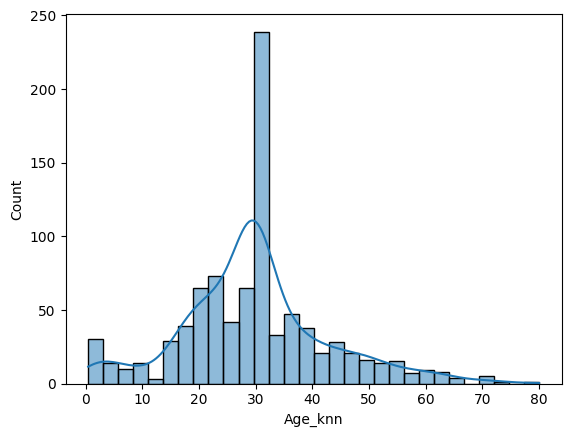

In [81]:
sns.histplot(df1["Age_knn"], kde=True)
df1["Age_knn"].skew()

outlier Fare 0.13019079685746351


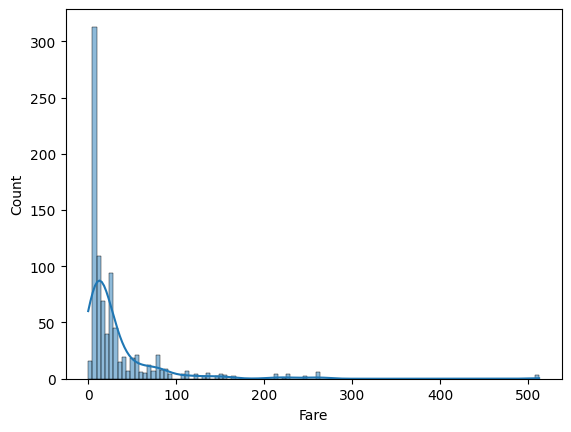

In [82]:
sns.histplot(df1["Fare"], kde=True)
df1["Fare"].skew()
print("outlier Fare", outlier(df1, "Fare"))

In [83]:
df1["Fare"].describe()
#to remove outlier using capping
upper_limit = df1["Fare"].mean() + 3 * df1["Fare"].std()
lower_limit = df1["Fare"].mean() - 3 * df1["Fare"].std()
df1["Fare_capped"] = np.where(df1["Fare"] > upper_limit, upper_limit, np.where(df1["Fare"] < lower_limit, lower_limit, df1["Fare"]))

<ipython-input-83-156f1ce5b8de>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1["Fare_capped"] = np.where(df1["Fare"] > upper_limit, upper_limit, np.where(df1["Fare"] < lower_limit, lower_limit, df1["Fare"]))


<Axes: xlabel='Fare_capped', ylabel='Count'>

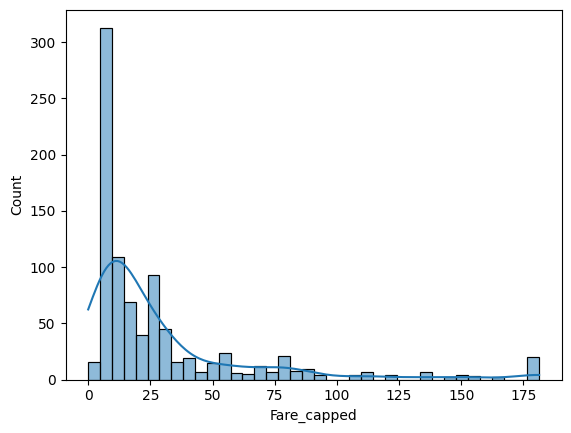

In [84]:
df1["Fare_capped"].describe()
sns.histplot(df1["Fare_capped"], kde=True)

In [85]:
#long right tailed in fare
#well use log then check for power

from sklearn.preprocessing import FunctionTransformer
ft= FunctionTransformer(np.log1p)
df1["Fare_log"]= ft.fit_transform(df1[["Fare"]])

<ipython-input-85-1b994f5afeea>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1["Fare_log"]= ft.fit_transform(df1[["Fare"]])


0.3949280095189306

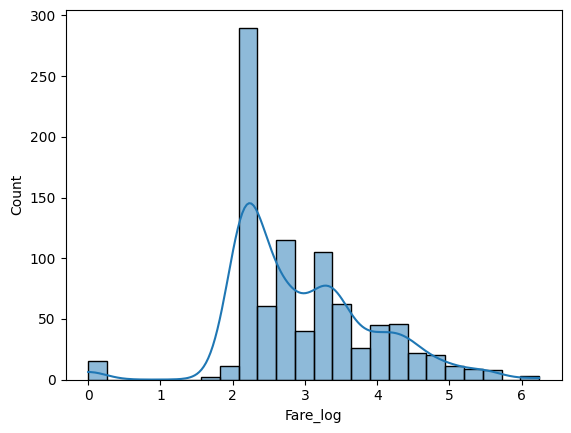

In [86]:
df1["Fare_log"].describe()
sns.histplot(df1["Fare_log"], kde=True)
df1["Fare_log"].skew()

In [87]:
#use power for more normal   ALL VALUES POSITIVE
from sklearn.preprocessing import PowerTransformer
pt= PowerTransformer()
df1["Fare_power"]= pt.fit_transform(df1[["Fare"]])

<ipython-input-87-13451ad5acd3>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1["Fare_power"]= pt.fit_transform(df1[["Fare"]])


-0.04032918275876422

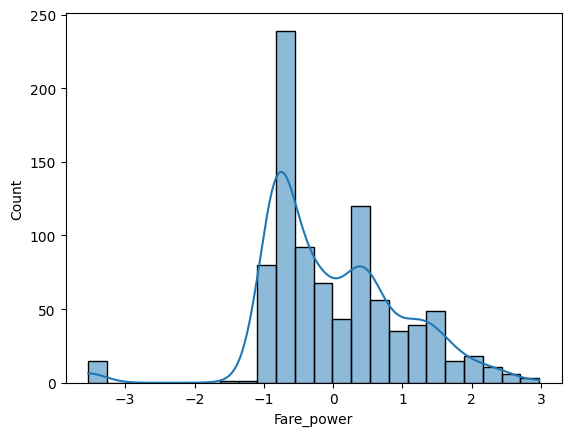

In [88]:
df1["Fare_power"].describe()
sns.histplot(df1["Fare_power"], kde=True)
df1["Fare_power"].skew()

In [89]:
#modelling
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [90]:
df1.head()

,Age,Fare,Survived,Age_knn,Age_sii,Fare_capped,Fare_log,Fare_power
0,22.0,7.2500,0,22.0,22.0,7.2500,2.110213,-0.878820
1,38.0,71.2833,1,38.0,38.0,71.2833,4.280593,1.336651
2,26.0,7.9250,1,26.0,26.0,7.9250,2.188856,-0.790065
3,35.0,53.1000,1,35.0,35.0,53.1000,3.990834,1.067352
4,35.0,8.0500,0,35.0,35.0,8.0500,2.202765,-0.774439


In [91]:

x3= df1[["Age_knn", "Fare_log"]]
x4= df1[["Age_knn", "Fare_power"]]

y= df1["Survived"]


In [92]:
X_train_3, X_test_3, y_train_3, y_test_3 = train_test_split(x3, y, test_size=0.2, random_state=42)
X_train_4, X_test_4, y_train_4, y_test_4 = train_test_split(x4, y, test_size=0.2, random_state=42)

In [93]:
clf1= LogisticRegression()
clf2= DecisionTreeClassifier()
clf3= RandomForestClassifier()
clf4= SVC()
clf5= GradientBoostingClassifier()

In [94]:

clf1_3=  SVC()
clf1_4=  SVC()

clf1_3.fit(X_train_3, y_train_3)
clf1_4.fit(X_train_4, y_train_4)


y_pred1_3= clf1_3.predict(X_test_3)
y_pred1_4= clf1_4.predict(X_test_4)


print("accuracy score", accuracy_score(y_test_3, y_pred1_3))
print("accuracy score", accuracy_score(y_test_4, y_pred1_4))

accuracy score 0.6089385474860335
accuracy score 0.6089385474860335


by logistic regression
accuracy score 0.6703910614525139
accuracy score 0.6703910614525139

by d_tree
accuracy score 0.664804469273743
accuracy score 0.659217877094972

by random forest
accuracy score 0.6871508379888268
accuracy score 0.664804469273743

by grad boost
accuracy score 0.7374301675977654
accuracy score 0.7374301675977654

by svc
accuracy score 0.6089385474860335
accuracy score 0.6089385474860335

Handling mixed variables

In [95]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Cabin,Embarked,family_size
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,373450,8.0500,NaN,S,0


In [96]:
df_mix= df[["Cabin","Ticket" ,"Survived"]]

In [97]:
df_mix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Cabin     204 non-null    object
 1   Ticket    891 non-null    object
 2   Survived  891 non-null    int64 
dtypes: int64(1), object(2)
memory usage: 21.0+ KB


In [98]:
df_mix["Cabin"]
#to extract cabin class
df_mix["cabin_class"]= df_mix["Cabin"].str[0]
#to extract cabin number
df_mix["cabin_no."]= df_mix["Cabin"].str.extract(r'(\d+)')
df_mix

<ipython-input-98-3fc652a0ac2d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_mix["cabin_class"]= df_mix["Cabin"].str[0]
<ipython-input-98-3fc652a0ac2d>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_mix["cabin_no."]= df_mix["Cabin"].str.extract(r'(\d+)')


,Cabin,Ticket,Survived,cabin_class,cabin_no.
0,NaN,A/5 21171,0,NaN,NaN
1,C85,PC 17599,1,C,85
2,NaN,STON/O2. 3101282,1,NaN,NaN
3,C123,113803,1,C,123
4,NaN,373450,0,NaN,NaN
...,...,...,...,...,...
886,NaN,211536,0,NaN,NaN
887,B42,112053,1,B,42
888,NaN,W./C. 6607,0,NaN,NaN
889,C148,111369,1,C,148


<Axes: xlabel='cabin_class'>

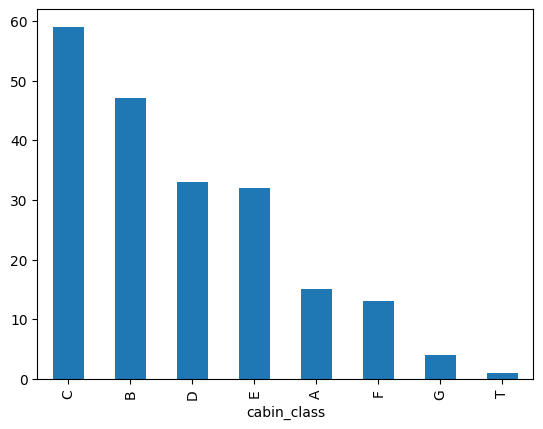

In [100]:
df_mix["cabin_class"].value_counts().plot(kind="bar")

In [101]:
df_mix["Ticket"]

,Ticket
0,A/5 21171
1,PC 17599
2,STON/O2. 3101282
3,113803
4,373450
...,...
886,211536
887,112053
888,W./C. 6607
889,111369


In [110]:
#extract first part
df_mix["Ticket_prefix"]= df_mix["Ticket"].apply(lambda x:x.split()[0])
df_mix["Ticket_prefix"]= np.where(df_mix["Ticket_prefix"].str.isdigit(),np.nan, df_mix["Ticket_prefix"])
df_mix["Ticket_prefix"]

<ipython-input-110-9c109ffe720f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_mix["Ticket_prefix"]= df_mix["Ticket"].apply(lambda x:x.split()[0])
<ipython-input-110-9c109ffe720f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_mix["Ticket_prefix"]= np.where(df_mix["Ticket_prefix"].str.isdigit(),np.nan, df_mix["Ticket_prefix"])


,Ticket_prefix
0,A/5
1,PC
2,STON/O2.
3,NaN
4,NaN
...,...
886,NaN
887,NaN
888,W./C.
889,NaN


In [113]:
#extract ticket no.
df_mix["Ticket_number"]= df_mix["Ticket"].apply(lambda x:x.split()[-1])
df_mix["Ticket_number"]= pd.to_numeric(df_mix["Ticket_number"], errors= "coerce", downcast= "integer")
df_mix["Ticket_number"]

<ipython-input-113-c8b15c337e5e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_mix["Ticket_number"]= df_mix["Ticket"].apply(lambda x:x.split()[-1])
<ipython-input-113-c8b15c337e5e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_mix["Ticket_number"]= pd.to_numeric(df_mix["Ticket_number"], errors= "coerce", downcast= "integer")


,Ticket_number
0,21171.0
1,17599.0
2,3101282.0
3,113803.0
4,373450.0
...,...
886,211536.0
887,112053.0
888,6607.0
889,111369.0
